**Feature engineering** is the process of transforming raw data into meaningful features that enhance model accuracy, performance, and predictive power.

Feature Engineering involves the below steps:
1. Handling Missing Values
2. Handling Imbalanced Dataset
3. Handling Outliers
4. Data Encoding

### Handling Missing Values
Missing values occurs in dataset when some of the informations is not stored for a variable
There are 3 mechanisms
1. Missing Completely at Random, MCAR.
2. Missing at Random MAR.
3. Missing data not at random (MNAR).

Below are the ways to Handle missing values:
Imputation Missing Values 
   - Mean Value Imputation   - Normally distributed data
   - Median Value Imputation - If we have outliers in the dataset
   - Mode Value Imputation   - Categorical values

## Examples

In [1]:
import seaborn as sns

In [2]:
df=sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Check missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
## Delete the rows or data point to handle missing values

df.shape

(891, 15)

In [7]:
df.dropna().shape

(182, 15)

In [10]:
## Column wise deletion
df.dropna(axis=1).shape

(891, 11)

## Imputation Missing Values
### 1- Mean Value Imputation

<Axes: xlabel='age', ylabel='Count'>

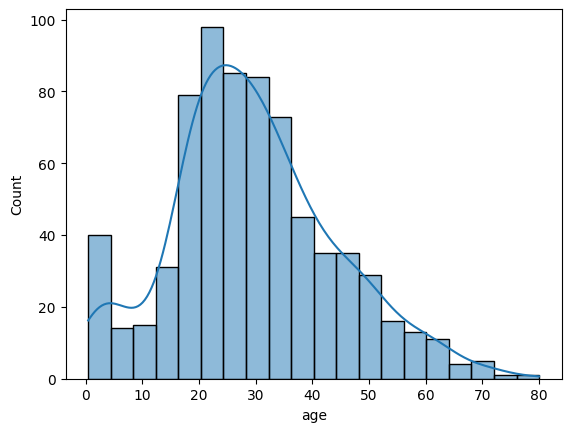

In [11]:
sns.histplot(df['age'],kde=True)

In [12]:
df['Age_mean']=df['age'].fillna(df['age'].mean())

In [13]:
df[['Age_mean','age']]

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


### 2. Median Value Imputation- If we have outliers in the dataset

In [14]:
df['age_median']=df['age'].fillna(df['age'].median())
df[['age_median','Age_mean','age']]

,age_median,Age_mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


### 3. Mode Imputation Technqiue--Categorical values

In [15]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [16]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
mode_value=df[df['embarked'].notna()]['embarked'].mode()[0]
df['embarked_mode']=df['embarked'].fillna(mode_value)
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [18]:
df['embarked_mode'].isnull().sum()

np.int64(0)

In [19]:
df['embarked'].isnull().sum()

np.int64(2)

## Handling Imbalanced Dataset
**Imbalanced dataset** is one where the number of samples in different classes is unevenly distributed, often leading to biased model performance.

1. Up Sampling - Increases the minority class samples.
2. Down Sampling - Reduces the majority class samples.
3. SMOTE - generates synthetic samples for the minority class to balance imbalanced datasets.

In [47]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [48]:
n_class_0,n_class_1

(900, 100)

In [49]:
## CREATE MY DATAFRAME WITH IMBALANCED DATASET
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [50]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)
df.tail()

,feature_1,feature_2,target
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1
999,2.697490,2.013570,1


In [51]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [52]:
## upsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [53]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True, #Sample With replacement
         n_samples=len(df_majority),
         random_state=42
    )

In [54]:
df_minority_upsampled.shape

(900, 3)

In [55]:
df_minority_upsampled.head()

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


In [56]:
df_upsampled=pd.concat([df_majority,df_minority_upsampled])
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

### Down Sampling

In [57]:
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

df = pd.concat([class_0, class_1]).reset_index(drop=True)

# Check the class distribution
print(df['target'].value_counts())

target
0    900
1    100
Name: count, dtype: int64


In [58]:
## downsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [59]:
from sklearn.utils import resample
df_majority_downsampled=resample(df_majority,replace=True, #Sample With replacement
         n_samples=len(df_minority),
         random_state=42
        )

In [60]:
df_majority_downsampled.shape

(100, 3)

In [ ]:
df_majority_downsampled.tail()

,feature_1,feature_2,target
201,-0.598105,1.575650,0
269,0.420180,0.570631,0
862,-0.392309,0.446491,0
815,-0.148405,-0.457929,0
270,-1.213385,0.675504,0


In [ ]:
df_down_sampled=pd.concat([df_majority_downsampled,df_minority])

In [ ]:
df_down_sampled['target'].value_counts()

target
0    100
1    100
Name: count, dtype: int64

**SMOTE (Synthetic Minority Over-sampling Technique)** is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

In [64]:
from sklearn.datasets import make_classification

In [65]:
X,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,
                   weights=[0.90],random_state=12)

In [66]:
import pandas as pd
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [67]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

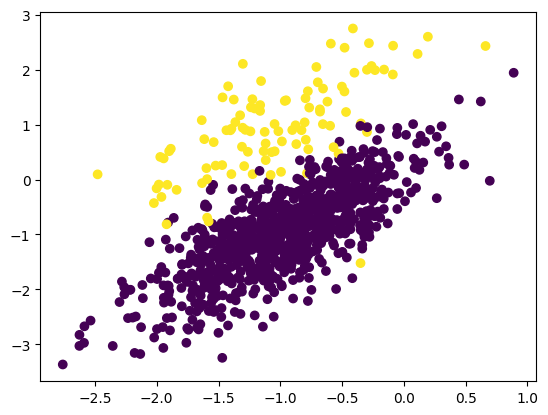

In [68]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [75]:
from imblearn.over_sampling import SMOTE
from sklearn.utils.validation import validate_data

In [78]:
## transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(final_df[['f1', 'f2']], final_df['target'])

d:\Restart\Fe_N_EDA\feNeda\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [79]:
X.shape

(1800, 2)

In [80]:
y.shape

(1800,)

In [81]:
len(y[y==0]) ,len(y[y==1])

(900, 900)

In [82]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

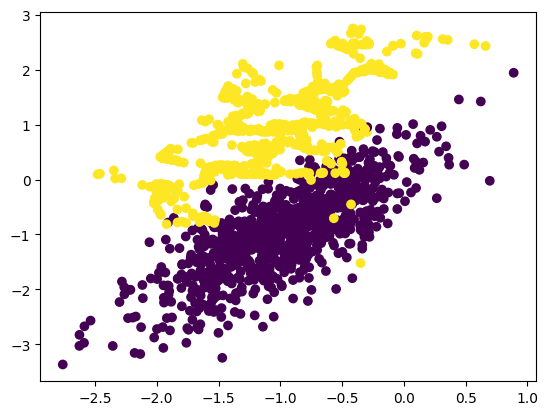

In [83]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])